In [2]:
import pandas as pd
import sqlite3 as sql

In [3]:
conn = sql.connect('database.sqlite')
conn

In [4]:
pd.read_sql('select * from sqlite_master where type = "table"', conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [5]:
def sql_query(q):
    return pd.read_sql_query(q,conn)


In [6]:
q = "select * from salaries"

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,9999999.00,567595.43,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
2,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
3,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
4,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148648,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


### Top 10 highest paid employees (by TotalPayBenefits)

In [8]:
q = '''select EmployeeName, TotalPayBenefits from salaries 
       order by 2 desc limit 10'''
sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,David Shinn,510732.68
2,Amy P Hart,479652.21
3,William J Coaker Jr.,436224.36
4,Gregory P Suhr,425815.28
5,Joanne M Hayes-White,422353.40
6,Gregory P Suhr,418019.22
7,Joanne M Hayes-White,417435.10
8,Ellen G Moffatt,415767.94
9,Gary Altenberg,407274.78


### Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

In [9]:
q = ''' select EmployeeName, year from salaries 
        where EmployeeName IN ("Not Provided" , "Not provided" )'''
sql_query(q)

,EmployeeName,Year
0,Not Provided,2011
1,Not Provided,2012
2,Not provided,2014
3,Not provided,2014
4,Not provided,2014
5,Not provided,2014


### Number of unique agencies

In [10]:
q = 'select count(distinct Agency) "unique agencies" from salaries'
sql_query(q)

,unique agencies
0,1


### Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [11]:
q = ''' select avg(BasePay) " avg BP ", avg(Overtimepay) " avg OTP ", avg(totalpay) " avg TP " from salaries 
        where year = 2011
        '''
sql_query(q)

,avg BP,avg OTP,avg TP
0,63593.401894,4524.411277,71992.050063


### Plot the top 10 job titles with the highest TotalPay in 2014.

In [49]:
q = ''' select jobTitle, max(Totalpay) "highestTotalPay_2014" from salaries
        where year = 2014
        group by jobTitle
        order by Totalpay desc
        limit 10 '''
x = sql_query(q)
x

,JobTitle,highestTotalPay_2014
0,Deputy Chief 3,471952.64
1,Asst Med Examiner,390111.98
2,Chief Investment Officer,339653.70
3,"Battalion Chief, Fire Suppress",335484.96
4,Asst Chf of Dept (Fire Dept),329390.54
5,Chief of Police,326716.76
6,"Chief, Fire Department",326233.44
7,Commander 3,322143.10
8,Senior Physician Specialist,311650.36
9,Dept Head V,311298.55


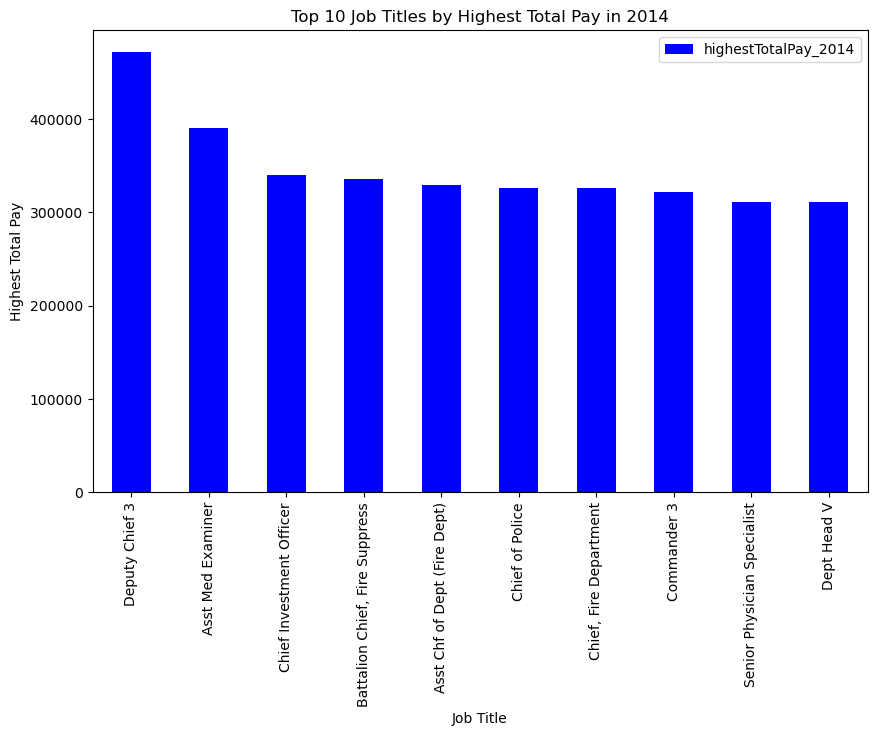

In [54]:
ax=x.plot(kind='bar', x='JobTitle', y='highestTotalPay_2014', color='blue', figsize=(10,6))
ax.set_xlabel('Job Title')
ax.set_ylabel('Highest Total Pay')
ax.set_title('Top 10 Job Titles by Highest Total Pay in 2014')
ax.legend()

### Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [29]:
q = ''' select jobtitle, overtimepay from salaries 
        where overtimepay > 150000 and
        jobtitle not in ("Not provided" , "Not Provided")
        '''
sql_query(q)               

,JobTitle,OvertimePay
0,"Lieutenant, Fire Suppression",220909.48
1,EMT/Paramedic/Firefighter,192424.49
2,Firefighter,160418.47
3,"Lieutenant, Fire Suppression",163477.81
4,Deputy Sheriff,196689.18
5,Deputy Sheriff,156077.49
6,Deputy Sheriff,173547.73
7,Deputy Sheriff,173178.23
8,Deputy Sheriff,169659.92


### Find all employees whose job titles contain the word “CHIEF”

In [56]:
q = ''' select EmployeeName, JobTitle from salaries
        where JobTitle LIKE '%CHIEF%'
        '''
sql_query(q) 

,EmployeeName,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


### Distinct job titles starting with "CAPTAIN"

In [57]:
q = ''' select distinct jobtitle from salaries
        where jobtitle like 'CAPTAIN%'
        '''
sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


### Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [60]:
q = ''' select employeename, basepay, totalpay 
        from salaries
        where basepay > 50000
        and totalpay < 150000
        and employeename NOT IN ('Not Provided', 'Not provided')
        '''
sql_query(q)        

,EmployeeName,BasePay,TotalPay
0,JAY DOWKE,112380.37,149987.24
1,MURRAY BOND,149975.8,149975.80
2,MARILOU GAN,119703.78,149970.85
3,BRIAN COLLINS,105934.65,149964.61
4,GREGORY NEAL,106065.2,149952.47
...,...,...,...
87253,Renee J Allen,52428.53,53458.31
87254,Melody M Butterworth,52389.79,52555.44
87255,Stephanie Reidy,51668.7,51785.23
87256,Paul E Maltzer,51673.98,51673.98
